In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [25]:
D, cluster_labels = make_blobs(n_samples = 500, centers=3, cluster_std=0.8, random_state=0)

In [26]:
D.shape

(500, 2)

In [27]:
cluster_labels

array([0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1,
       1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1,
       1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2,
       0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 2,
       2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0,
       2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 0, 0, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0,
       2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 2,
       1, 2, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1,
       1, 0, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 2, 2, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0,

Text(0.5, 1.0, '2-dimensional clusters')

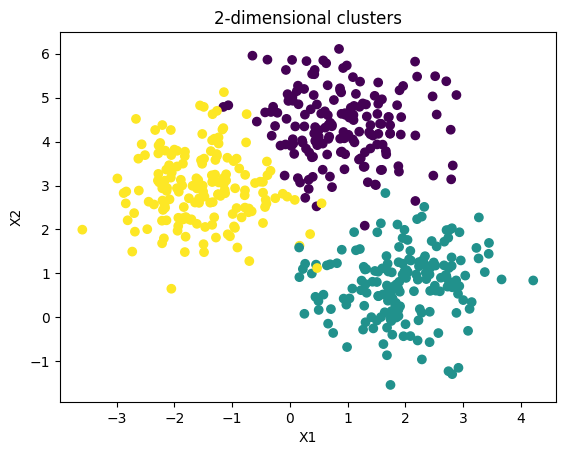

In [28]:
plt.scatter(D[:,0], D[:,1], c=cluster_labels)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2-dimensional clusters')

In [29]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)

In [30]:
pred_cluster_labels_3 = kmeans.fit_predict(D)

In [31]:
pred_cluster_labels_3[:100]

array([1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0, 0,
       0, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 2,
       2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 1], dtype=int32)

In [9]:
kmeans.cluster_centers_

array([[ 1.92615725,  0.78390257],
       [ 0.88763766,  4.3727351 ],
       [-1.55500135,  2.96109343]])

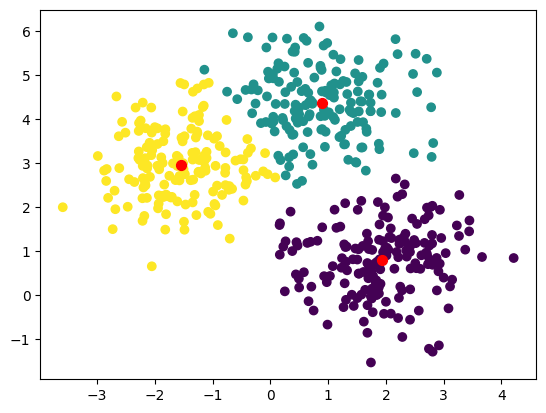

In [32]:
plt.scatter(D[:,0], D[:,1], c=pred_cluster_labels_3)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='red')

In [33]:
kmeans.inertia_

594.7636472067954

In [11]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
pred_cluster_labels = kmeans.fit_predict(D)

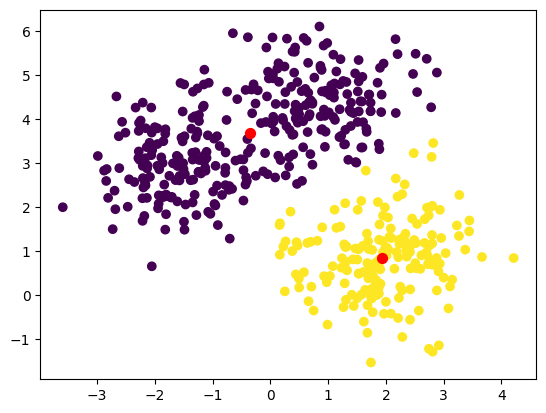

In [13]:
plt.scatter(D[:,0], D[:,1], c=pred_cluster_labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='red')

In [14]:
kmeans.inertia_

1240.595672169963

In [15]:
kmeans = KMeans(n_clusters=50, init='k-means++', max_iter=300, random_state=0)
pred_cluster_labels = kmeans.fit_predict(D)

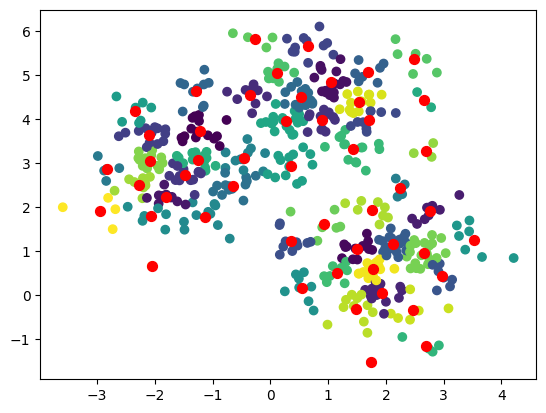

In [16]:
plt.scatter(D[:,0], D[:,1], c=pred_cluster_labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='red')

In [17]:
kmeans.inertia_

39.77951480791991

### Elbow Method
How many clusters to choose?

In [18]:
inertias = np.zeros(50)
for i in range(1, 51):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit_predict(D)
    inertias[i-1] = kmeans.inertia_

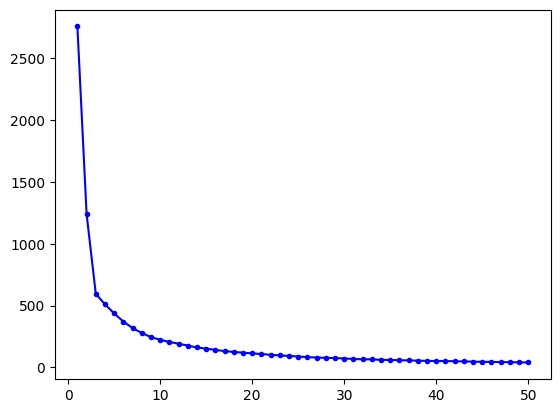

In [19]:
plt.plot(range(1,51), inertias, c='b', marker='.')

In [20]:
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import f1_score

In [35]:
contingency_matrix(cluster_labels, pred_cluster_labels_3)

array([[  2, 162,   3],
       [166,   1,   0],
       [  3,   3, 160]])

In [38]:
f1_score(cluster_labels, pred_cluster_labels_3, average= 'weighted')

0.32887660185859857

Why is it so low?

In [37]:
silhouette_score(D, pred_cluster_labels_3)

0.5543491901117578

In [45]:
silhouette = np.zeros(49)
for i in range(2, 51):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, random_state=0)
    pred_labels= kmeans.fit_predict(D)
    silhouette[i-2] = silhouette_score(D, pred_labels)

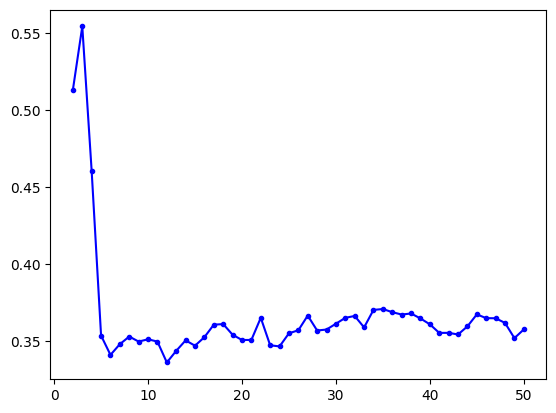

In [47]:
plt.plot(range(2,51), silhouette, c='b', marker='.')

In [57]:
from sklearn.datasets import make_moons
X, cluster_labels = make_moons(n_samples=500, noise=0.1)

Text(0, 0.5, 'X2')

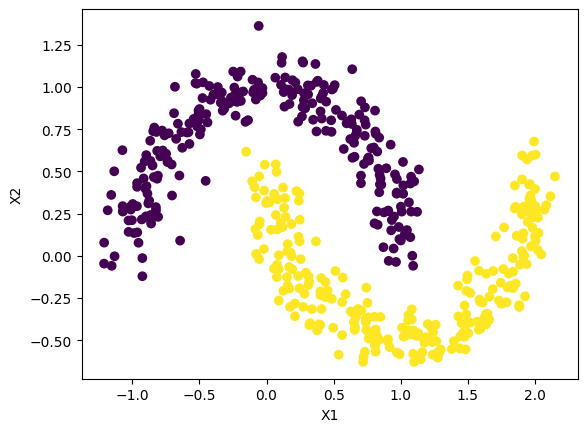

In [58]:
plt.scatter(X[:,0],X[:,1], c=cluster_labels)
plt.xlabel('X1')
plt.ylabel('X2')

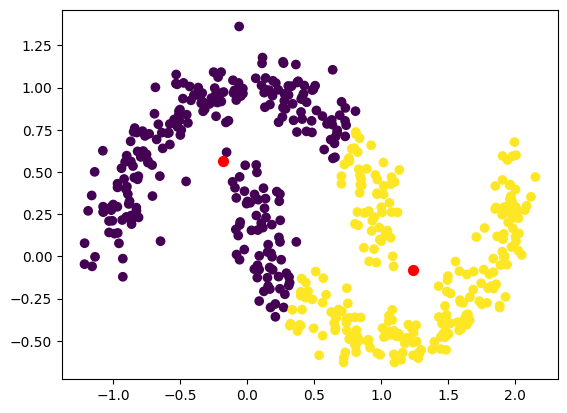

In [62]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
plt.scatter(X[:,0], X[:,1], c=kmeans.fit_predict(X))
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='red')

In [63]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.15, min_samples=11).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 25


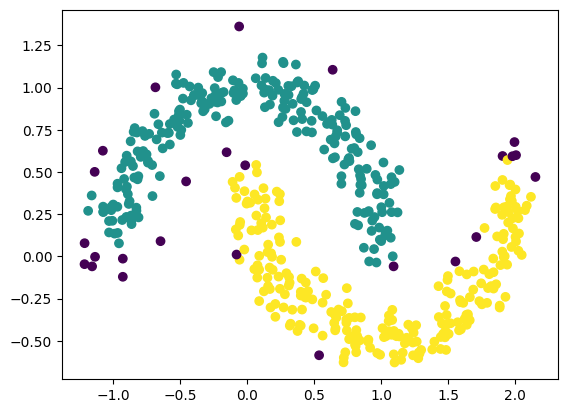

In [64]:
plt.scatter(X[:,0], X[:,1], c=labels)

In [65]:
from sklearn.datasets import make_circles
X, cluster_labels = make_circles(
    n_samples=1000,noise = 0.08, factor=0.5)

Text(0, 0.5, 'X2')

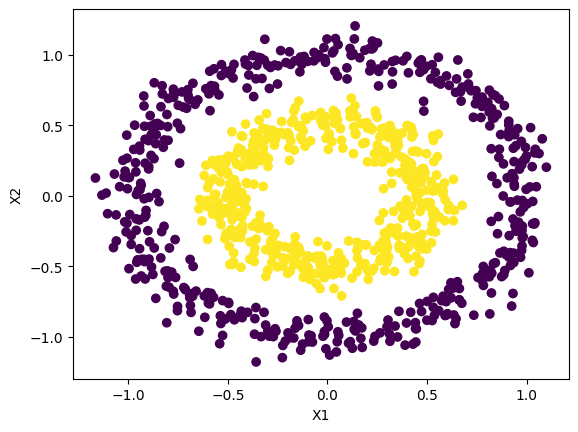

In [66]:
plt.scatter(X[:,0],X[:,1], c=cluster_labels)
plt.xlabel('X1')
plt.ylabel('X2')

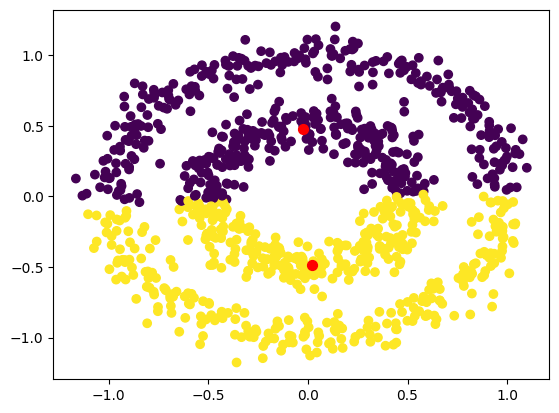

In [67]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
plt.scatter(X[:,0], X[:,1], c=kmeans.fit_predict(X))
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='red')

In [68]:
db = DBSCAN(eps=0.11, min_samples=6).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 14


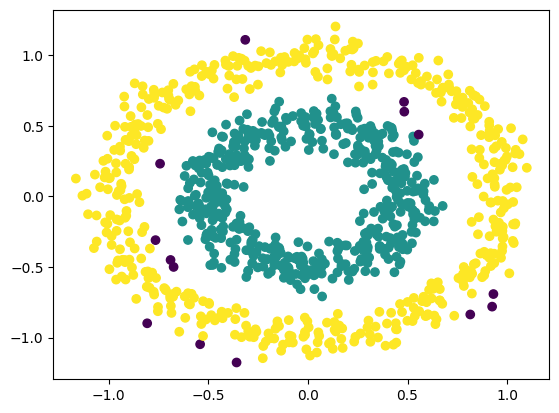

In [69]:
plt.scatter(X[:,0], X[:,1], c=labels)

In [107]:
D, cluster_labels = make_blobs(n_samples = 500, centers=[[0,0], [1,1]], cluster_std=[0.2, 0.4], random_state=0)

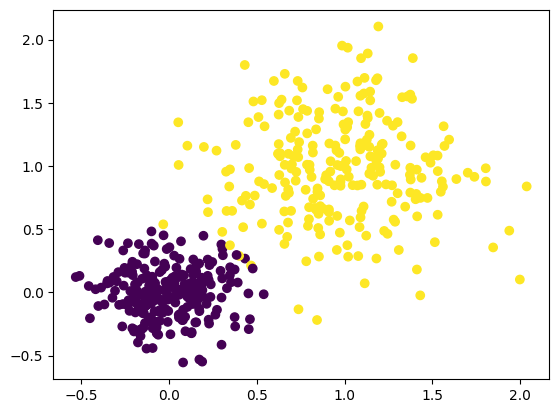

In [108]:
plt.scatter(D[:,0], D[:,1], c=cluster_labels)

In [109]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
pred_cluster_labels = kmeans.fit_predict(D)

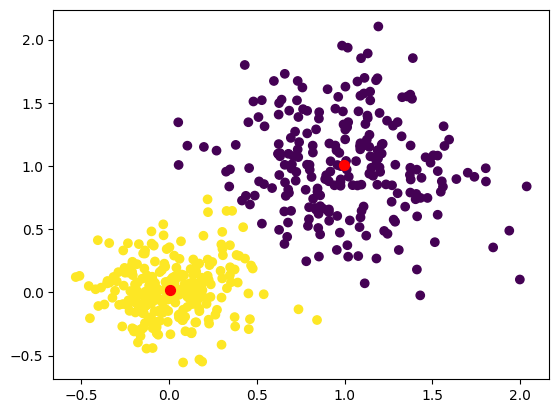

In [110]:
plt.scatter(D[:,0], D[:,1], c=pred_cluster_labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='red')

In [129]:
db = DBSCAN(eps=0.15, min_samples=8).fit(D)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 61


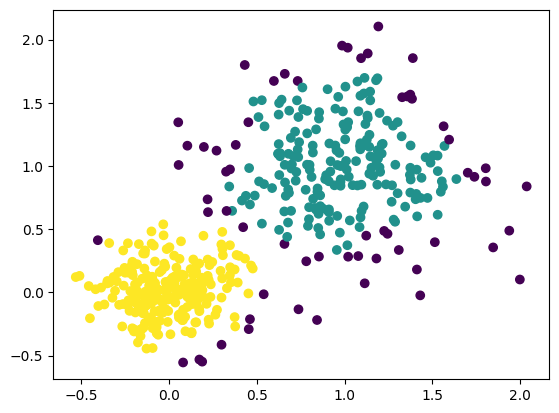

In [130]:
plt.scatter(D[:,0], D[:,1], c=labels)

In [56]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
iris_data = load_iris()
X=iris_data['data']
labels_iris = iris_data['target']
n_true_clusters = len(set(labels_iris))
print(n_true_clusters)

3


In [157]:
dbs = DBSCAN(eps=0.3, min_samples = 5)
dbs.fit(X)
dbs.labels_

array([ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0,  0, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,
       -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  2,  2, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2])

In [93]:
labels_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [158]:
n_clusters = len(set(dbs.labels_)) - (1 if -1 in dbs.labels_ else 0)

In [159]:
n_clusters

3

In [160]:
n_noise_points = sum(dbs.labels_ == -1)
print(n_noise_points)

96


In [161]:
X.shape

(150, 4)

In [162]:
dbs = DBSCAN(eps=0.5, min_samples = 5)
dbs.fit(X)
dbs.labels_
n_clusters = len(set(dbs.labels_)) - (1 if -1 in dbs.labels_ else 0)
print('number of clusters: ', n_clusters)
n_noise_points = sum(dbs.labels_ == -1)
print('number of noise points: ',n_noise_points)

number of clusters:  2
number of noise points:  17


In [163]:
dbs.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [164]:
from sklearn.decomposition import PCA

In [165]:
pca = PCA()
pca_transformed_iris_data = pca.fit_transform(X)

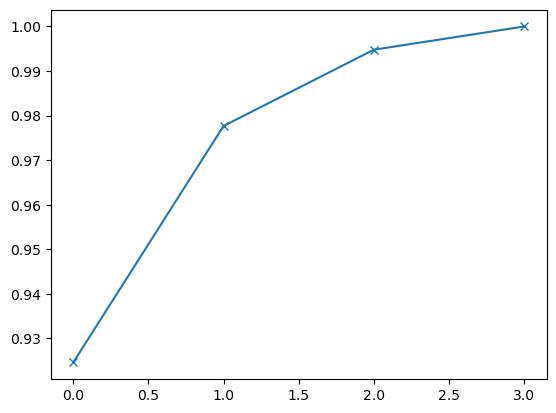

In [166]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='x')

In [103]:
pca_transformed_iris_data.shape

(150, 4)

Text(0, 0.5, 'X2')

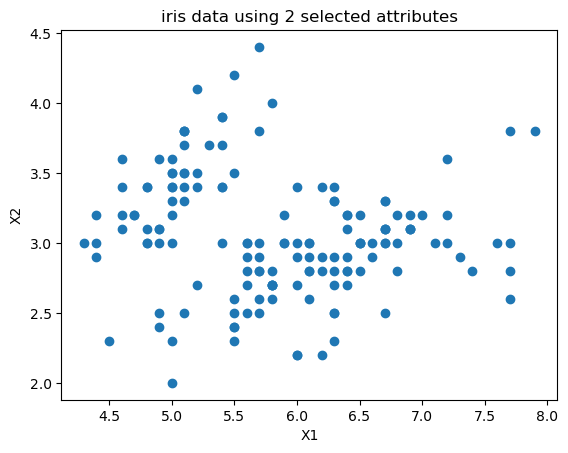

In [167]:
plt.scatter(X[:,0], X[:,1])
plt.title('iris data using 2 selected attributes')
plt.xlabel('X1')
plt.ylabel('X2')

Text(0, 0.5, 'X2')

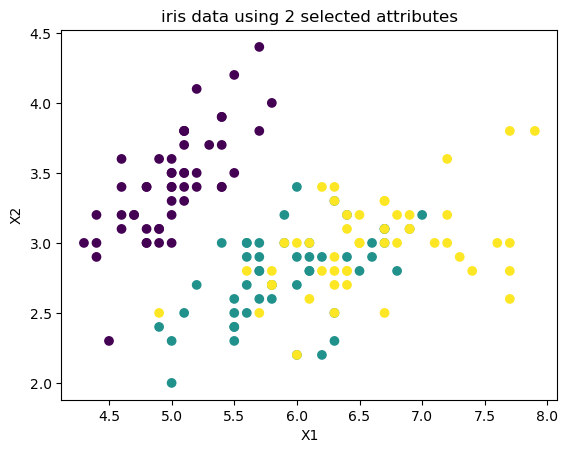

In [168]:
plt.scatter(X[:,0], X[:,1], c= labels_iris)
plt.title('iris data using 2 selected attributes')
plt.xlabel('X1')
plt.ylabel('X2')

Text(0, 0.5, 'X3')

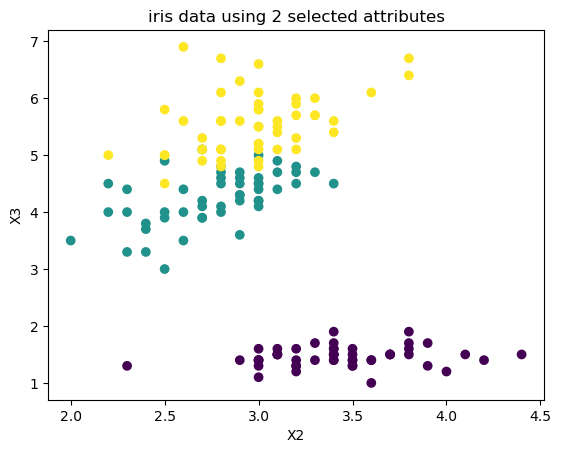

In [169]:
plt.scatter(X[:,1], X[:,2], c= labels_iris)
plt.title('iris data using 2 selected attributes')
plt.xlabel('X2')
plt.ylabel('X3')

Text(0, 0.5, 'PC2')

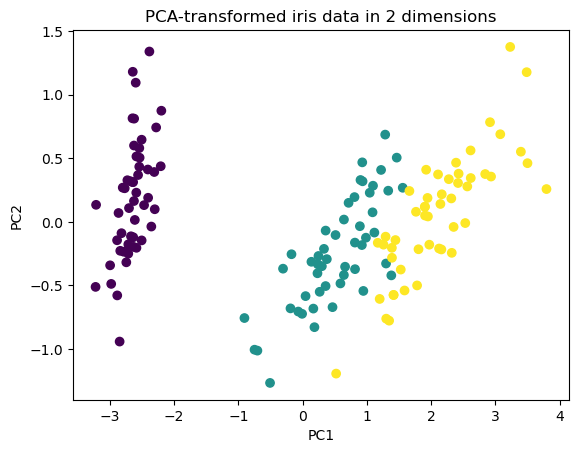

In [170]:
plt.scatter(pca_transformed_iris_data[:,0], pca_transformed_iris_data[:,1], c=labels_iris)
plt.title('PCA-transformed iris data in 2 dimensions')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

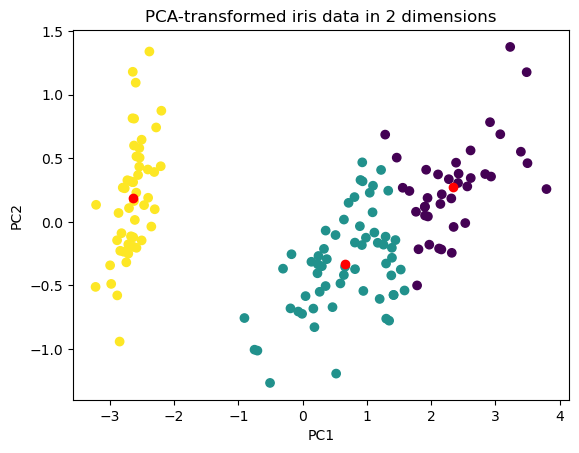

In [171]:
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, random_state = 0)
kmeans.fit(pca_transformed_iris_data[:,0:2])
pred_cluster_labels = kmeans.labels_
plt.scatter(pca_transformed_iris_data[:,0], pca_transformed_iris_data[:,1], c=pred_cluster_labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],c='red')
plt.title('PCA-transformed iris data in 2 dimensions')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

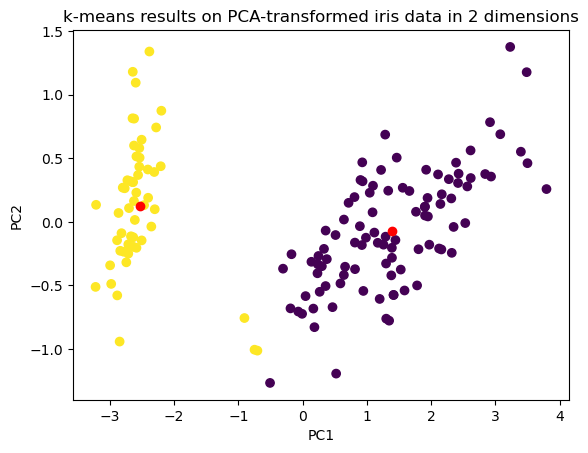

In [172]:
kmeans = KMeans(n_clusters=2, init='random', max_iter=300, random_state = 0)
kmeans.fit(pca_transformed_iris_data[:,0:2])
pred_cluster_labels = kmeans.labels_
plt.scatter(pca_transformed_iris_data[:,0], pca_transformed_iris_data[:,1], c=pred_cluster_labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],c='red')
plt.title('k-means results on PCA-transformed iris data in 2 dimensions')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

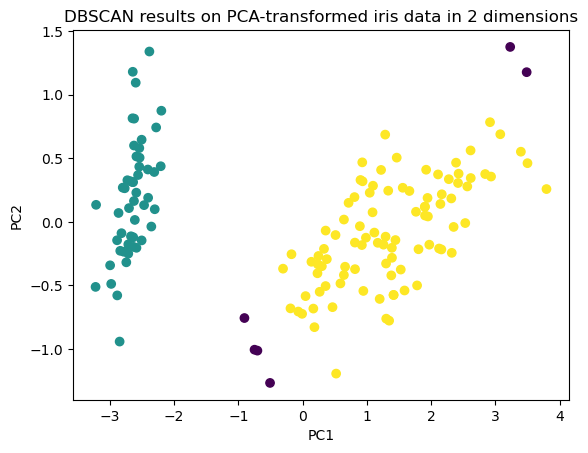

In [173]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.6, min_samples=5)
dbs.fit(pca_transformed_iris_data[:,0:2])
plt.scatter(pca_transformed_iris_data[:,0], pca_transformed_iris_data[:,1], c=dbs.labels_)
plt.title('DBSCAN results on PCA-transformed iris data in 2 dimensions')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [112]:
dbs.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

Text(0, 0.5, 'PC2')

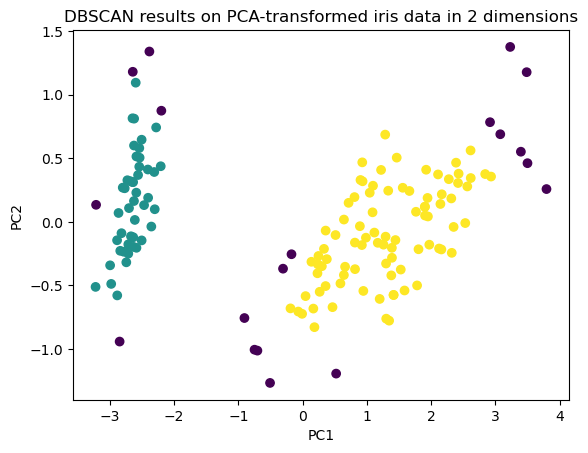

In [174]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.3, min_samples=5)
dbs.fit(pca_transformed_iris_data[:,0:2])
plt.scatter(pca_transformed_iris_data[:,0], pca_transformed_iris_data[:,1], c=dbs.labels_)
plt.title('DBSCAN results on PCA-transformed iris data in 2 dimensions')
plt.xlabel('PC1')
plt.ylabel('PC2')

number of clusters:  2
number of noise points:  21


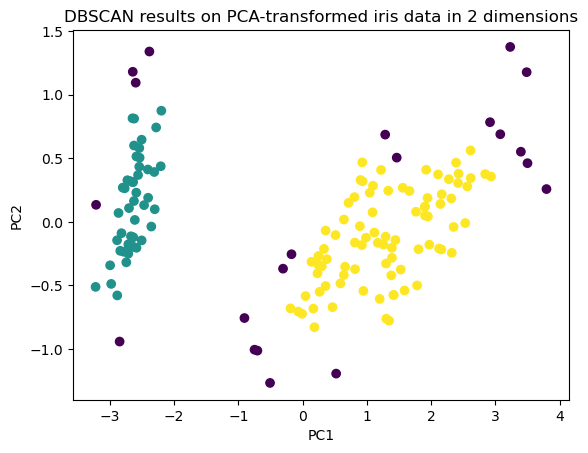

In [177]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.25, min_samples=3)
dbs.fit(pca_transformed_iris_data[:,0:2])
plt.scatter(pca_transformed_iris_data[:,0], pca_transformed_iris_data[:,1], c=dbs.labels_)
plt.title('DBSCAN results on PCA-transformed iris data in 2 dimensions')
plt.xlabel('PC1')
plt.ylabel('PC2')
n_clusters = len(set(dbs.labels_)) - (1 if -1 in dbs.labels_ else 0)
print('number of clusters: ', n_clusters)
n_noise_points = sum(dbs.labels_ == -1)
print('number of noise points: ',n_noise_points)